<a href="https://colab.research.google.com/github/wanwanliang/ML_Practices/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
assert sys.version_info >= (3,5)
import sklearn
assert sklearn.__version__ >= "0.20"

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()

x = iris['data'][:,(2,3)]
y = iris['target']
print(x.shape)

(150, 2)


In [ ]:
class2 = (y==0)|(y==1)
pd.DataFrame(class2).value_counts()

True     100
False     50
dtype: int64

In [ ]:
x = x[class2]
y = y[class2]

print(x.shape)

(100, 2)


In [ ]:
svm_clf = SVC(kernel='linear', C=float('inf'))
svm_clf.fit(x,y)

SVC(C=inf, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y,svm_clf.predict(x))

1.0

In [ ]:
w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]

print(w)
print(b)

[1.29411744 0.82352928]
-3.7882347112962464


In [ ]:
print(svm_clf.coef_)
print(svm_clf.intercept_)

[[1.29411744 0.82352928]]
[-3.78823471]


In [ ]:
svm_clf.support_vectors_

array([[1.9, 0.4],
       [3. , 1.1]])

In [ ]:
def plot_svm_decision_boundary(svm_clf, xmin, xmax, x, y):

  w = svm_clf.coef_[0]
  b = svm_clf.intercept_[0]

  x0 = np.linspace(xmin, xmax, 200)
  decision_boundary = -w[0]/w[1] * x0 -b/w[1]

  margin = 1/w[1]
  gutter_up = decision_boundary + margin
  gutter_down = decision_boundary - margin
  svs = svm_clf.support_vectors_

  plt.scatter(svs[:,0],svs[:,1], s=180, facecolors='#FFAAAA')
  plt.plot(x0, decision_boundary, 'k-', linewidth=2)
  plt.plot(x0, gutter_up, 'k--', linewidth=2)
  plt.plot(x0, gutter_down, 'k--', linewidth=2)
  plt.axis([0, 5., -1, 3])

  plt.plot(x[:,0][y==1], x[:,1][y==1], "bs")
  plt.plot(x[:, 0][y==0], x[:, 1][y==0], 'yo')

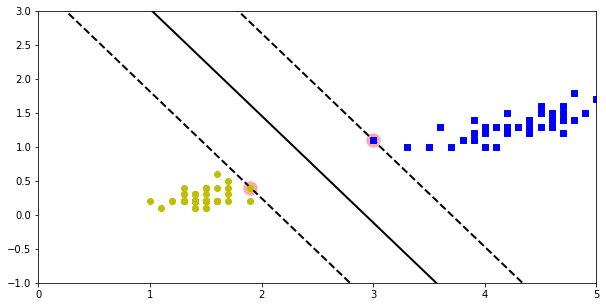

In [ ]:
plt.figure(figsize=(10,5))
plot_svm_decision_boundary(svm_clf, 0, 5.5, x, y)
plt.show()

In [ ]:
svm_clf_c1 = SVC(kernel='linear', C=0.1)
svm_clf_c2 = SVC(kernel='linear', C=1)
svm_clf_c3 = SVC(kernel='linear', C=10000)

svm_clf_c1.fit(x,y)
svm_clf_c2.fit(x,y)
svm_clf_c3.fit(x,y)

SVC(C=10000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

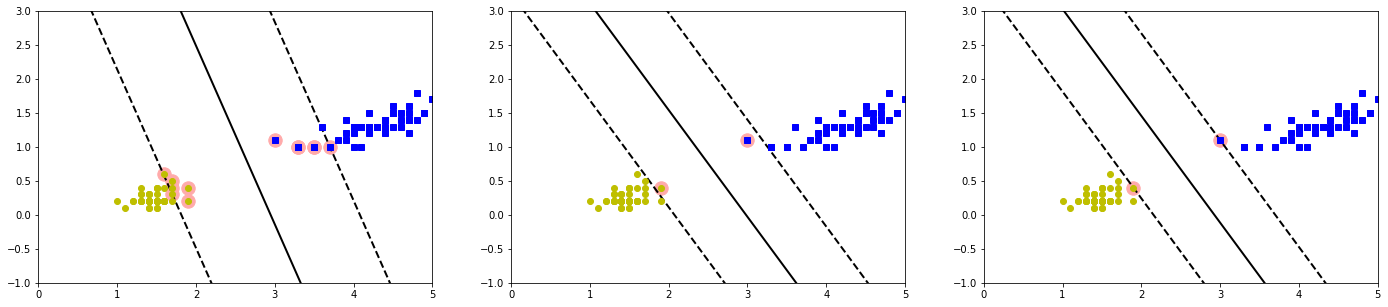

In [ ]:
plt.figure(figsize=(24,5))
plt.subplot(131)
plot_svm_decision_boundary(svm_clf_c1, 0, 5.5, x, y)
plt.subplot(132)
plot_svm_decision_boundary(svm_clf_c2, 0, 5.5, x, y)
plt.subplot(133)
plot_svm_decision_boundary(svm_clf_c3, 0, 5.5, x, y)
plt.show()

In [ ]:
from numpy import ravel
x1 = np.linspace(0, 5, 300)
x2 = np.linspace(-1, 3, 200) 

x1, x2 = np.meshgrid(x1, x2)
print(x1.shape)
print(x2.shape)

x = np.c_[x1.ravel(), x2.ravel()]
z= svm_clf_c3.predict(x).reshape(x1.shape)

(200, 300)
(200, 300)


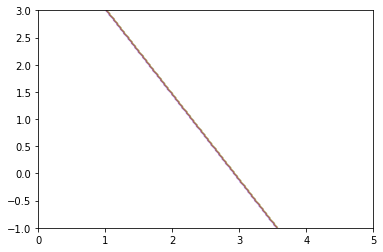

In [ ]:
plt.contour(x1, x2, z, cmap=plt.cm.brg, alpha=0.2)
